The tank data got broken, I'm presuming some bug crawled in front of the sensor, since there are a lot of short-distance measurements now. Didn't open the tank again, we can fix this in software!

In [1]:
import pandas as pd
import matplotlib as plt
%matplotlib inline

In [2]:
distances = pd.read_csv('tank_broken_distances.txt', sep=' ', names=['title', 'dist'])['dist']

In [3]:
distances.describe()

count     889.000000
mean      699.892013
std       681.914780
min        40.000000
25%       204.000000
50%       301.000000
75%      1682.000000
max      1716.000000
Name: dist, dtype: float64

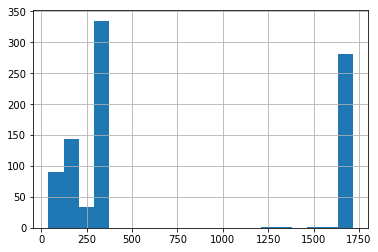

In [4]:
distances.hist(bins=20)

In [5]:
mode = distances.mode()[0]
mode

301

Yep, it's broken.. Let's have a closer look.

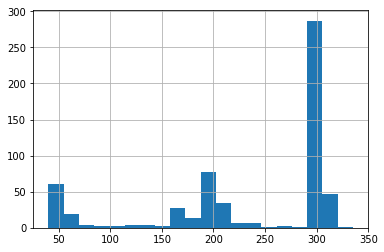

In [6]:
distances[distances<500].hist(bins=20)

Alright, let's just filter out everything < 350!

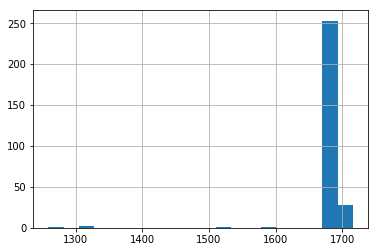

In [7]:
distances_fixed = distances[distances >= 350]
distances_fixed.hist(bins=20)

In [8]:
mode_fixed = distances_fixed.mode()[0]
mode_fixed

1689

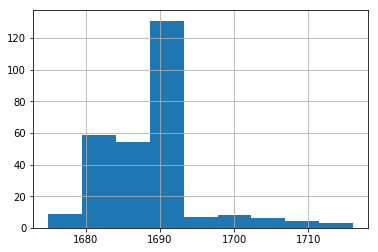

In [9]:
margin = 30
cropped = distances_fixed[(distances_fixed > mode_fixed - margin) & (distances_fixed < mode_fixed + margin)]
cropped.hist(bins=9)

In [10]:
cropped.describe()

count     281.000000
mean     1687.978648
std         6.551410
min      1675.000000
25%      1685.000000
50%      1689.000000
75%      1690.000000
max      1716.000000
Name: dist, dtype: float64